In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib.colors import ListedColormap
import plotly.express as px
import streamlit as st
import plotly.graph_objects as go

Import dataset

In [4]:
df= pd.read_csv("simpsons_episodes.csv")

In [9]:
st.dataframe(df)

2024-02-16 09:49:43.547 
  command:

    streamlit run C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

View dataset

In [ ]:
df


,id,title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating,tmdb_rating,tmdb_vote_count
0,0,Simpsons Roasting on an Open Fire,Homer is forced to become a department store S...,1989-12-17,7G08,David Silverman,Mimi Pond,1,1,1,26.70,8.1,6.921,101
1,1,Bart the Genius,Bart ends up at a school for gifted children a...,1990-01-14,7G02,David Silverman,Jon Vitti,1,2,2,24.50,7.7,7.400,62
2,2,Homer's Odyssey,"After losing his job, Homer contemplates endin...",1990-01-21,7G03,Wes Archer,Jay Kogen & Wallace Wolodarsky,1,3,3,27.50,7.3,6.500,58
3,3,There's No Disgrace Like Home,After being embarrassed by the rest of the fam...,1990-01-28,7G04,Gregg Vanzo & Kent Butterworth,Al Jean & Mike Reiss,1,4,4,20.20,7.7,7.200,52
4,4,Bart the General,After being beaten up by Nelson Muntz one too ...,1990-02-04,7G05,David Silverman,John Swartzwelder,1,5,5,27.10,7.9,6.900,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,742,Fan-ily Feud,Homer publicly disparages a pop singer and fac...,2023-04-23,OABF11,Timothy Bailey,Broti Gupta,34,18,746,1.00,5.2,4.500,2
743,743,Write Off This Episode,Marge is seduced by the money and prestige of ...,2023-04-30,OABF12,Matthew Nastuk,J. Stewart Burns,34,19,747,0.89,5.8,6.500,2
744,744,The Very Hungry Caterpillars,The Simpsons are forced to spend time with eac...,2023-05-07,OABF14,Gabriel DeFrancesco,Brian Kelley,34,20,748,0.82,6.7,6.000,2
745,745,Clown V. Board of Education,"Krusty opens a school for clowning, which beco...",2023-05-14,OABF15,Lance Kramer,Jeff Westbrook,34,21,749,0.77,6.3,6.000,2


Check column types

In [ ]:
print(df.dtypes)

id                          int64
title                      object
description                object
original_air_date          object
production_code            object
directed_by                object
written_by                 object
season                      int64
number_in_season            int64
number_in_series            int64
us_viewers_in_millions    float64
imdb_rating               float64
tmdb_rating               float64
tmdb_vote_count             int64
characters                 object
dtype: object


Correct Column Types

In [5]:
df['original_air_date'] = pd.to_datetime(df['original_air_date'])

Create new column "year"

In [6]:

df['year'] = df['original_air_date'].dt.year

Check duplicated rows

In [ ]:
df.duplicated().sum()


0

Create chart "Average US viewers per season"

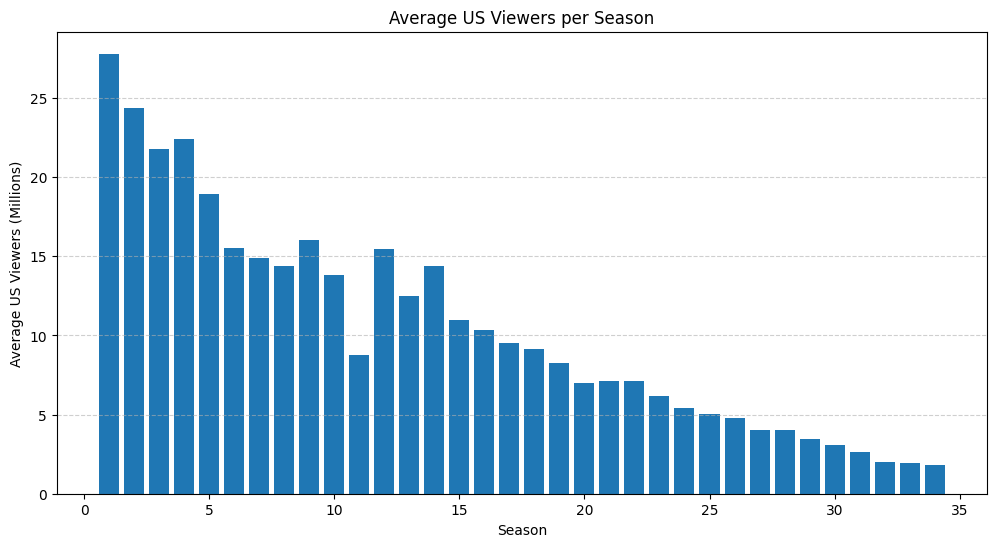

In [ ]:
# Calculate the average of the values in "us_viewers_in_millions" grouped by "season"
season_avg_viewers = df.groupby('season')['us_viewers_in_millions'].mean()

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(season_avg_viewers.index, season_avg_viewers.values)
plt.xlabel('Season')
plt.ylabel('Average US Viewers (Millions)')
plt.title('Average US Viewers per Season')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Create chart "Average ratings per season"

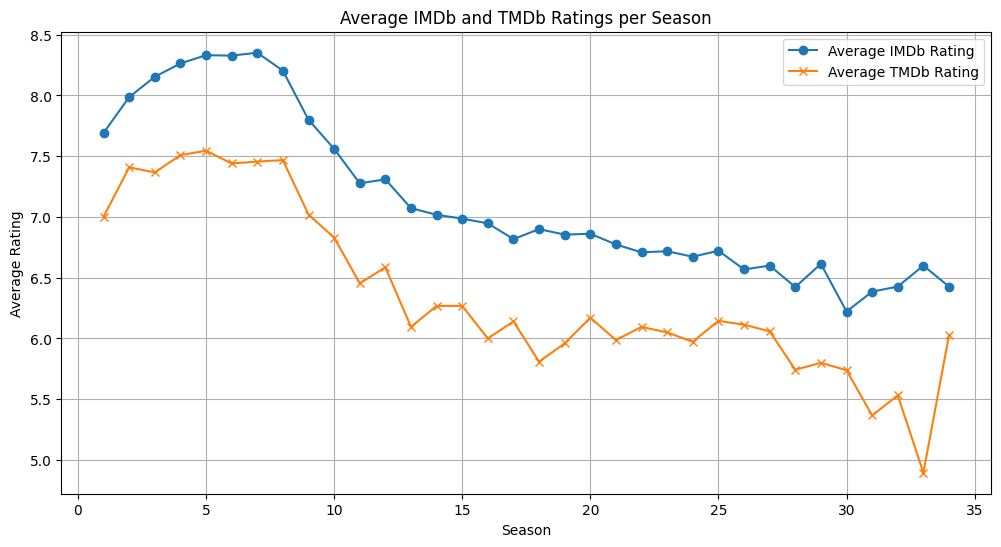

In [ ]:
# Calculate the average ratings grouped by season
season_avg_ratings = df.groupby('season')[['imdb_rating', 'tmdb_rating']].mean()

# Create the line graph
plt.figure(figsize=(12, 6))
plt.plot(season_avg_ratings.index, season_avg_ratings['imdb_rating'], label='Average IMDb Rating', marker='o')
plt.plot(season_avg_ratings.index, season_avg_ratings['tmdb_rating'], label='Average TMDb Rating', marker='x')

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average IMDb and TMDb Ratings per Season')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

Top 5 most viewed chapters

In [ ]:
top_5_chapters_viewers = df.nlargest(5, 'us_viewers_in_millions')[["title", "description", "directed_by", "written_by", "season", "number_in_season", "us_viewers_in_millions", "imdb_rating", "tmdb_rating"]]
print(top_5_chapters_viewers)

                    title                                        description  \
13       Bart Gets an 'F'  Mrs. Krabappel, fed up with Bart's lackadaisic...   
8   Life on the Fast Lane  Marge contemplates an affair with a handsome b...   
10    The Crepes of Wrath  Bart is sent to France on a student exchange p...   
11     Krusty Gets Busted  After Krusty is found guilty of robbing the Kw...   
9       Homer's Night Out  After a photograph of Homer canoodling with an...   

                 directed_by  \
13           David Silverman   
8            David Silverman   
10  Wes Archer & Milton Gray   
11                 Brad Bird   
9                 Rich Moore   

                                           written_by  season  \
13                                     David M. Stern       2   
8                                   John Swartzwelder       1   
10  George Meyer, Sam Simon, John Swartzwelder & J...       1   
11                     Jay Kogen & Wallace Wolodarsky       1   
9

Top 5 least seen chapters

In [ ]:
bottom_5_chapters_viewers = df.nsmallest(5, 'us_viewers_in_millions')[["title", "description", "directed_by", "written_by", "season", "number_in_season", "us_viewers_in_millions", "imdb_rating", "tmdb_rating"]]
print(bottom_5_chapters_viewers)

                            title  \
740            Hostile Kirk Place   
745   Clown V. Board of Education   
744  The Very Hungry Caterpillars   
722              Marge the Meanie   
741                       Pin Gal   

                                           description          directed_by  \
740  Kirk goes on a crusade to censor and control t...    Steven Dean Moore   
745  Krusty opens a school for clowning, which beco...         Lance Kramer   
744  The Simpsons are forced to spend time with eac...  Gabriel DeFrancesco   
722  Lisa finds an unlikely mentor in Shauna Chalme...       Timothy Bailey   
741  Jacques returns to coach Marge for a bowling t...       Chris Clements   

         written_by  season  number_in_season  us_viewers_in_millions  \
740   Michael Price      34                16                    0.77   
745  Jeff Westbrook      34                21                    0.77   
744    Brian Kelley      34                20                    0.82   
722     Me

Top 5 chapters accordig to imdb

In [ ]:
top_5_imdb = df.nlargest(5, 'imdb_rating')[["title", "description", "directed_by", "written_by", "season", "number_in_season", "us_viewers_in_millions", "imdb_rating", "tmdb_rating"]]
print(top_5_imdb)

                            title  \
175                 Homer's Enemy   
82                     Cape Feare   
108         Treehouse of Horror V   
127  Who Shot Mr. Burns? - Part I   
154           You Only Move Twice   

                                           description       directed_by  \
175  Homer's laziness begets the ire of his industr...       Jim Reardon   
82   After being released from prison on parole, Si...        Rich Moore   
108  The family's job at Mr. Burns' country estate ...       Jim Reardon   
127  After Mr. Burns steals oil from Springfield El...     Jeffrey Lynch   
154  After moving to another town for a new job, Ho...  Mike B. Anderson   

                       written_by  season  number_in_season  \
175             John Swartzwelder       8                23   
82                      Jon Vitti       5                 2   
108                   Bob Kushell       6                 6   
127  Bill Oakley & Josh Weinstein       6                25   
154  

Top 5 chapters according to tmdb

In [ ]:
top_5_tmdb = df.nlargest(5, 'tmdb_rating')[["title", "description", "directed_by", "written_by", "season", "number_in_season", "us_viewers_in_millions", "imdb_rating", "tmdb_rating"]]
print(top_5_tmdb)

                     title                                        description  \
82              Cape Feare  After being released from prison on parole, Si...   
162  The Springfield Files  Special Agents Mulder and Scully arrive in Spr...   
167         Homer's Phobia  After Marge befriends John, a gay store owner,...   
61       Homer the Heretic  Homer decides to stay at home every Sunday whi...   
111           Homer Badman  Homer accidentally lands himself in trouble wi...   

           directed_by     written_by  season  number_in_season  \
82          Rich Moore      Jon Vitti       5                 2   
162  Steven Dean Moore  Reid Harrison       8                10   
167   Mike B. Anderson      Ron Hauge       8                15   
61         Jim Reardon   George Meyer       4                 3   
111         Jeff Lynch   Greg Daniels       6                 9   

     us_viewers_in_millions  imdb_rating  tmdb_rating  
82                    20.00          9.2          8.6 

Top 5 writers with more views

In [ ]:
top_5_writers_more_views = df.groupby('written_by')['us_viewers_in_millions'].mean().nlargest(5)
print(top_5_writers_more_views)

written_by
George Meyer, Sam Simon, John Swartzwelder & Jon Vitti    31.2
Al Jean, Mike Reiss, Sam Simon & Matt Groening            28.0
Matt Groening & Sam Simon                                 27.1
Al Jean, Mike Reiss & Sam Simon                           26.8
Mimi Pond                                                 26.7
Name: us_viewers_in_millions, dtype: float64


top 5 writers with less views

In [ ]:
top_5_writers_less_views = df.groupby('written_by')['us_viewers_in_millions'].mean().nsmallest(5)
print(top_5_writers_less_views)

written_by
Loni Steele Sosthand             1.065000
Pete Holmes                      1.350000
Jeff Martin & Samantha Martin    1.380000
Megan Amram                      1.446667
Nick Dahan                       1.480000
Name: us_viewers_in_millions, dtype: float64


Top 5 directors with mores views

In [ ]:
top_5_directors_more_views = df.groupby('directed_by')['us_viewers_in_millions'].mean().nlargest(5)
print(top_5_directors_more_views)

directed_by
Wes Archer & Milton Gray              31.200000
Brad Bird                             30.400000
David Silverman & Kent Butterworth    27.100000
Rich Moore & Alan Smart               23.900000
Rich Moore                            22.873333
Name: us_viewers_in_millions, dtype: float64


Top 5 directors with less views

In [ ]:
top_5_directors_less_views = df.groupby('directed_by')['us_viewers_in_millions'].mean().nsmallest(5)
print(top_5_directors_less_views)

directed_by
Gabriel DeFrancesco    0.820000
Jennifer Moeller       1.391429
Debbie Bruce Mahan     1.883333
Timothy Bailey         3.572727
Rob Oliver             4.004375
Name: us_viewers_in_millions, dtype: float64


Create column "Characters"

In [6]:
# List of characters
characters_list = ["Homer", "Marge", "Bart", "Lisa", "Maggie", "Ned", "Maude", "Rod", "Todd", "Mr. Burns", "Smithers", "Krusty", "Milhouse", "Nelson", "Ralph", "Chief Wiggum", "Lou", "Eddie", "Moe", "Lenny", "Carl", "Barney", "Reverend Lovejoy", "Helen", "Clancy", "Seymour", "Edna", "Patty", "Selma", "Mayor Quimby", "Sideshow Bob", "Jimbo", "Kearney", "Dolph", "Groundskeeper Willie", "Dr. Hibbert", "Bernice", "Itchy", "Scratchy", "Apu", "Manjula", "Comic Book Guy", "Professor Frink", "Snake", "Hans", "Uter", "Duffman", "Bumblebee Man", "Squeaky-Voiced Teen", "Jasper"]

# Function to find characters in the description
def find_characters(description):
    characters = []
    for character in characters_list:
        if re.search(r'\b{}\b'.format(re.escape(character)), description, re.IGNORECASE):
            characters.append(character)
    return characters

# Create the new "characters" column
df['characters'] = df['description'].apply(find_characters)

# Display the first few rows to verify
print(df[['title', 'description', 'characters']].head())

                               title  \
0  Simpsons Roasting on an Open Fire   
1                    Bart the Genius   
2                    Homer's Odyssey   
3      There's No Disgrace Like Home   
4                   Bart the General   

                                         description            characters  
0  Homer is forced to become a department store S...  [Homer, Marge, Bart]  
1  Bart ends up at a school for gifted children a...                [Bart]  
2  After losing his job, Homer contemplates endin...               [Homer]  
3  After being embarrassed by the rest of the fam...               [Homer]  
4  After being beaten up by Nelson Muntz one too ...        [Bart, Nelson]  


Top 10 most popular characters according to number of views

In [ ]:

# Use explode function to expand the lists in the "characters" column
df_exploded = df.explode('characters')

# Group by "characters" and calculate the mean of "us_viewers_in_millions"
avg_viewers_by_character = df_exploded.groupby('characters')['us_viewers_in_millions'].mean()

# Sort in descending order and get the top 10 values
top_10_avg_viewers_by_character = avg_viewers_by_character.sort_values(ascending=False).head(10)

# Display the results
print(top_10_avg_viewers_by_character)

characters
Jasper         17.800000
Dr. Hibbert    16.700000
Barney         16.150000
Ralph          16.133333
Itchy          15.547500
Scratchy       15.547500
Seymour        14.900000
Jimbo          13.980000
Selma          13.624167
Maude          12.986667
Name: us_viewers_in_millions, dtype: float64


Top 10 most popular characters according to imdb

In [ ]:

# Use explode function to expand the lists in the "characters" column
df_exploded = df.explode('characters')

# Group by "characters" and calculate the mean of "imdb_rating"
avg_viewers_by_character = df_exploded.groupby('characters')['imdb_rating'].mean()

# Sort in descending order and get the top 10 values
top_10_avg_viewers_by_character = avg_viewers_by_character.sort_values(ascending=False).head(10)

# Display the results
print(top_10_avg_viewers_by_character)

characters
Barney          8.100000
Jasper          8.000000
Maude           7.866667
Scratchy        7.737500
Itchy           7.737500
Ralph           7.666667
Jimbo           7.650000
Mayor Quimby    7.625000
Dr. Hibbert     7.600000
Sideshow Bob    7.525000
Name: imdb_rating, dtype: float64


Top 10 most popular characters according to tmdb

In [ ]:

# Use explode function to expand the lists in the "characters" column
df_exploded = df.explode('characters')

# Group by "characters" and calculate the mean of "tmdb_rating"
avg_viewers_by_character = df_exploded.groupby('characters')['tmdb_rating'].mean()

# Sort in descending order and get the top 10 values
top_10_avg_viewers_by_character = avg_viewers_by_character.sort_values(ascending=False).head(10)

# Display the results
print(top_10_avg_viewers_by_character)

characters
Barney          7.450000
Itchy           7.162500
Scratchy        7.162500
Dr. Hibbert     7.100000
Maude           7.038000
Ralph           6.866667
Jasper          6.800000
Jimbo           6.750000
Mayor Quimby    6.725000
Mr. Burns       6.624528
Name: tmdb_rating, dtype: float64


In [12]:
from plotly.subplots import make_subplots

Create chart "Average Us viewers, imdb, and tmdb ratings over time"

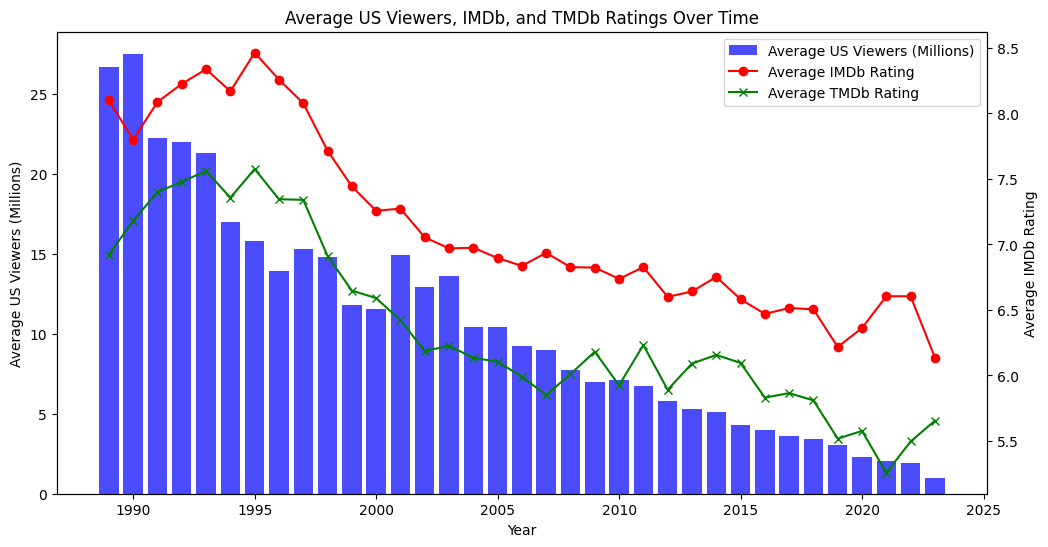

In [ ]:
# Calculate averages per year for each column
avg_us_viewers = df.groupby('year')['us_viewers_in_millions'].mean()
avg_imdb_rating = df.groupby('year')['imdb_rating'].mean()
avg_tmdb_rating = df.groupby('year')['tmdb_rating'].mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bars for the average of "us_viewers_in_millions"
ax1.bar(avg_us_viewers.index, avg_us_viewers, color='b', alpha=0.7, label='Average US Viewers (Millions)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average US Viewers (Millions)')
ax1.tick_params(axis='y')

# Create a second y-axis for the lines
ax2 = ax1.twinx()

# Line for the average of "imdb_rating"
ax2.plot(avg_imdb_rating.index, avg_imdb_rating, color='r', marker='o', label='Average IMDb Rating')
ax2.set_ylabel('Average IMDb Rating')
ax2.tick_params(axis='y')

# Line for the average of "tmdb_rating"
ax2.plot(avg_tmdb_rating.index, avg_tmdb_rating, color='g', marker='x', label='Average TMDb Rating')
ax2.tick_params(axis='y')

# Add legend
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Add title
plt.title('Average US Viewers, IMDb, and TMDb Ratings Over Time')

# Show the plot
plt.show()


Create chart "Number of chapter with Highest US Viewers in Millions for Each Season"

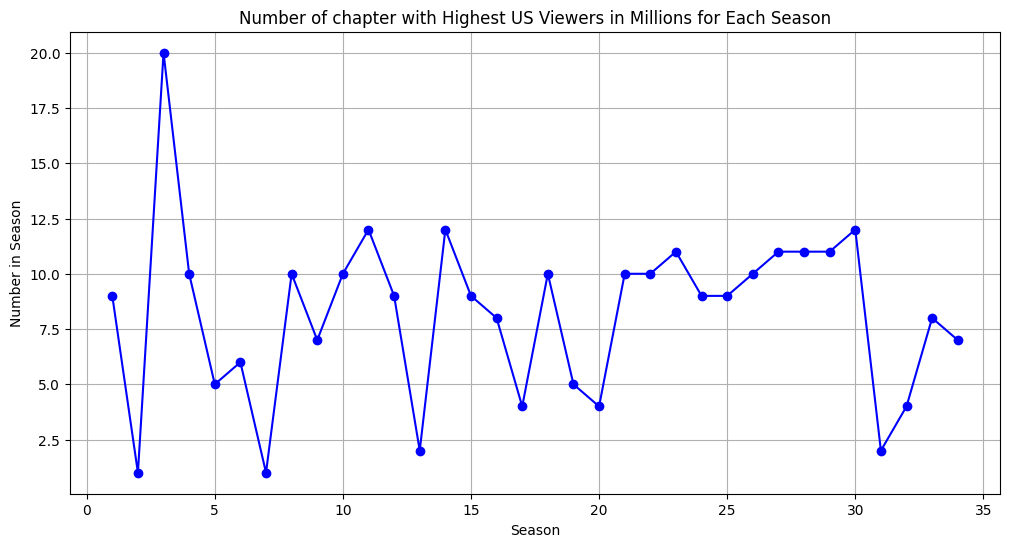

In [ ]:
# Find the index of the maximum "us_viewers_in_millions" for each "season"
idx = df.groupby('season')['us_viewers_in_millions'].idxmax()

# Filter the original DataFrame using the found indices
result = df.loc[idx, ['season', 'number_in_season', 'us_viewers_in_millions']]

# Sort the result by "season" for a clearer line plot
result = result.sort_values('season')

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(result['season'], result['number_in_season'], marker='o', color='b', linestyle='-')
plt.xlabel('Season')
plt.ylabel('Number in Season')
plt.title('Number of chapter with Highest US Viewers in Millions for Each Season')
plt.grid(True)
plt.show()

In [ ]:
# Names of writers with more views
top_writers_more_views = top_5_writers_more_views.index.tolist()

# Names of writers with less views
top_writers_less_views = top_5_writers_less_views.index.tolist()

# Combine both sets of names
all_writers = top_writers_more_views + top_writers_less_views

# Create the "writers" DataFrame
writers = pd.DataFrame({'written_by': all_writers})

# Reset the index of the new DataFrame
writers.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(writers)

                                          written_by
0  George Meyer, Sam Simon, John Swartzwelder & J...
1     Al Jean, Mike Reiss, Sam Simon & Matt Groening
2                          Matt Groening & Sam Simon
3                    Al Jean, Mike Reiss & Sam Simon
4                                          Mimi Pond
5                               Loni Steele Sosthand
6                                        Pete Holmes
7                      Jeff Martin & Samantha Martin
8                                        Megan Amram
9                                         Nick Dahan


In [ ]:
# Calculate the average viewership per writer in the "df" DataFrame
avg_viewers = df.groupby('written_by')['us_viewers_in_millions'].mean().reset_index()

# Merge the "writers" DataFrame with the average viewership DataFrame
writers_with_avg_viewers = writers.merge(avg_viewers, on='written_by', how='left')

# Rename the column to indicate it contains the average viewership
writers_with_avg_viewers.rename(columns={'us_viewers_in_millions': 'avg_us_viewers_in_millions'}, inplace=True)

# Display the updated DataFrame
print(writers_with_avg_viewers)

                                          written_by  \
0  George Meyer, Sam Simon, John Swartzwelder & J...   
1     Al Jean, Mike Reiss, Sam Simon & Matt Groening   
2                          Matt Groening & Sam Simon   
3                    Al Jean, Mike Reiss & Sam Simon   
4                                          Mimi Pond   
5                               Loni Steele Sosthand   
6                                        Pete Holmes   
7                      Jeff Martin & Samantha Martin   
8                                        Megan Amram   
9                                         Nick Dahan   

   avg_us_viewers_in_millions  
0                   31.200000  
1                   28.000000  
2                   27.100000  
3                   26.800000  
4                   26.700000  
5                    1.065000  
6                    1.350000  
7                    1.380000  
8                    1.446667  
9                    1.480000  


In [ ]:
# Calculate the average IMDb rating per writer in the "df" DataFrame
avg_imdb_rating = df.groupby('written_by')['imdb_rating'].mean().reset_index()

# Merge the "writers_with_avg_viewers" DataFrame with the average IMDb rating DataFrame
writers_with_avg_ratings = writers_with_avg_viewers.merge(avg_imdb_rating, on='written_by', how='left')

# Rename the column to indicate it contains the average IMDb rating
writers_with_avg_ratings.rename(columns={'imdb_rating': 'avg_imdb_rating'}, inplace=True)

# Display the updated DataFrame
print(writers_with_avg_ratings)

                                          written_by  \
0  George Meyer, Sam Simon, John Swartzwelder & J...   
1     Al Jean, Mike Reiss, Sam Simon & Matt Groening   
2                          Matt Groening & Sam Simon   
3                    Al Jean, Mike Reiss & Sam Simon   
4                                          Mimi Pond   
5                               Loni Steele Sosthand   
6                                        Pete Holmes   
7                      Jeff Martin & Samantha Martin   
8                                        Megan Amram   
9                                         Nick Dahan   

   avg_us_viewers_in_millions  avg_imdb_rating  
0                   31.200000             7.70  
1                   28.000000             7.60  
2                   27.100000             7.70  
3                   26.800000             8.20  
4                   26.700000             8.10  
5                    1.065000             6.15  
6                    1.350000           

In [ ]:
# Calculate the average TMDb rating per writer in the "df" DataFrame
avg_tmdb_rating = df.groupby('written_by')['tmdb_rating'].mean().reset_index()

# Merge the "writers_with_avg_ratings" DataFrame with the average TMDb rating DataFrame
writers_with_avg_ratings = writers_with_avg_ratings.merge(avg_tmdb_rating, on='written_by', how='left')

# Rename the column to indicate it contains the average TMDb rating
writers_with_avg_ratings.rename(columns={'tmdb_rating': 'avg_tmdb_rating'}, inplace=True)

# Display the updated DataFrame
print(writers_with_avg_ratings)

                                          written_by  \
0  George Meyer, Sam Simon, John Swartzwelder & J...   
1     Al Jean, Mike Reiss, Sam Simon & Matt Groening   
2                          Matt Groening & Sam Simon   
3                    Al Jean, Mike Reiss & Sam Simon   
4                                          Mimi Pond   
5                               Loni Steele Sosthand   
6                                        Pete Holmes   
7                      Jeff Martin & Samantha Martin   
8                                        Megan Amram   
9                                         Nick Dahan   

   avg_us_viewers_in_millions  avg_imdb_rating  avg_tmdb_rating  
0                   31.200000             7.70         7.000000  
1                   28.000000             7.60         7.000000  
2                   27.100000             7.70         7.200000  
3                   26.800000             8.20         7.900000  
4                   26.700000             8.10       

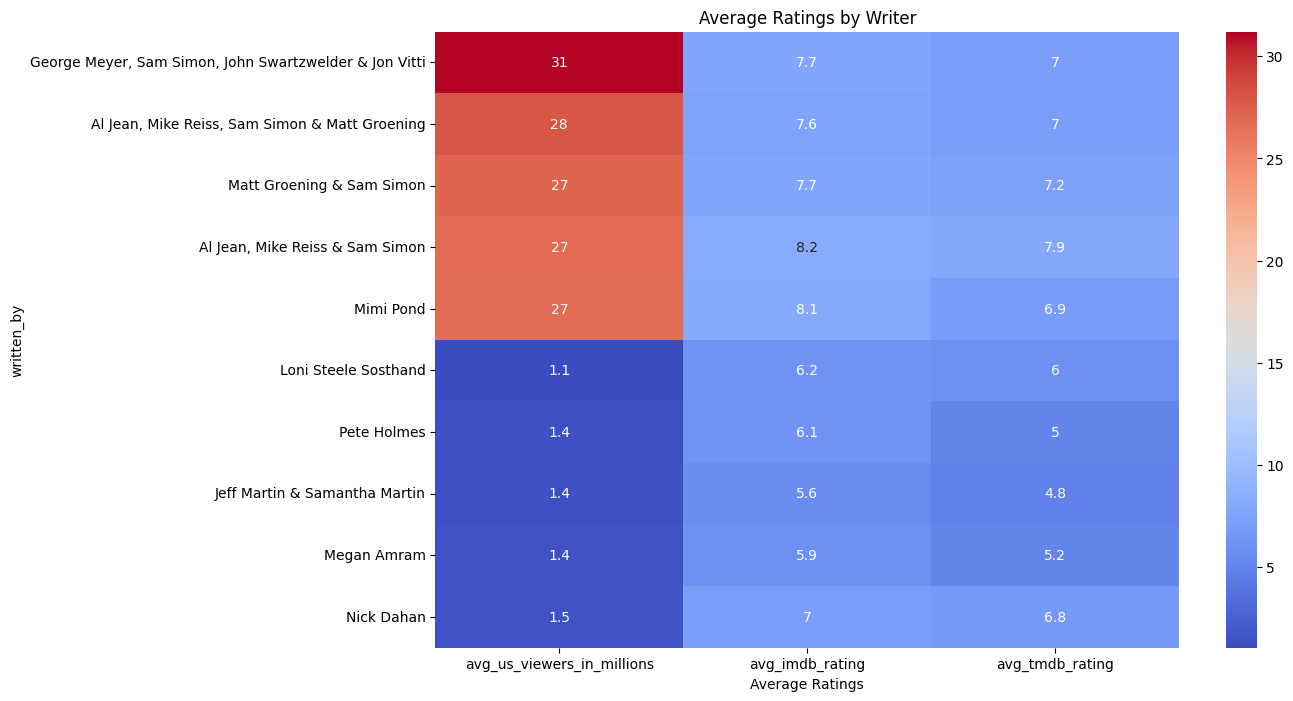

In [ ]:
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(writers_with_avg_ratings.set_index('written_by')[['avg_us_viewers_in_millions', 'avg_imdb_rating', 'avg_tmdb_rating']], annot=True, cmap='coolwarm')
plt.ylabel('written_by')
plt.xlabel('Average Ratings')
plt.title('Average Ratings by Writer')
plt.show()

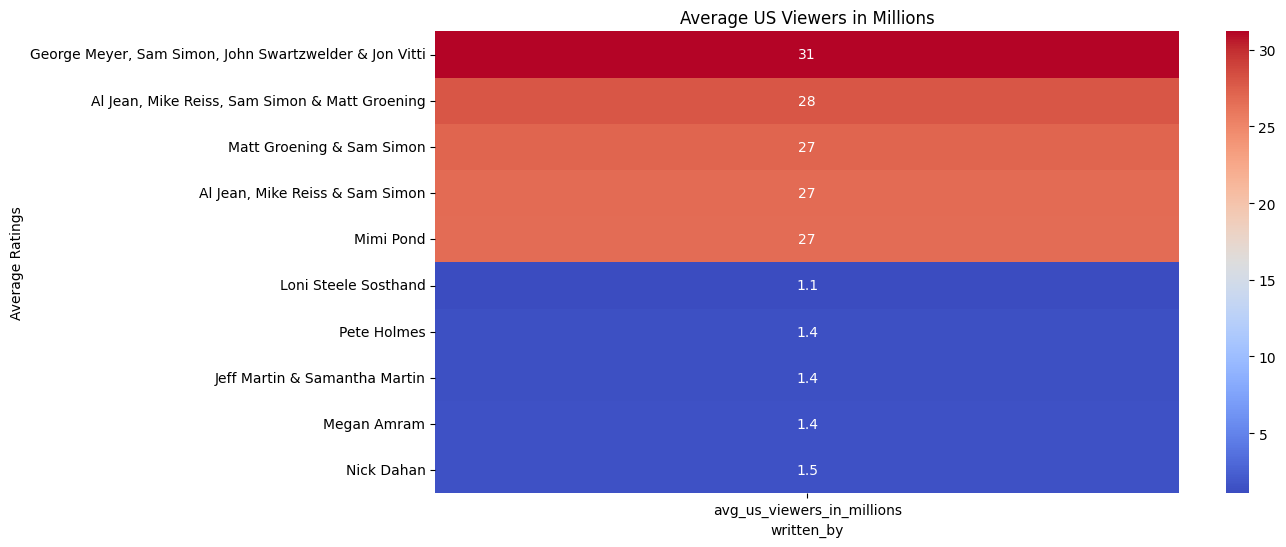

In [ ]:
# Create the first heatmap for avg_us_viewers_in_millions
plt.figure(figsize=(12, 6))
sns.heatmap(writers_with_avg_ratings[['written_by', 'avg_us_viewers_in_millions']].set_index('written_by'), annot=True, cmap='coolwarm')
plt.title('Average US Viewers in Millions')
plt.xlabel('written_by')
plt.ylabel('Average Ratings')
plt.show()

In [1]:
# Create the second heatmap for avg_imdb_rating and avg_tmdb_rating
plt.figure(figsize=(12, 6))
sns.heatmap(writers_with_avg_ratings[['written_by', 'avg_imdb_rating', 'avg_tmdb_rating']].set_index('written_by'), annot=True, cmap='coolwarm')
plt.title('Average IMDb and TMDb Ratings')
plt.xlabel('written_by')
plt.ylabel('Average Ratings')
plt.show()

NameError: name 'plt' is not defined

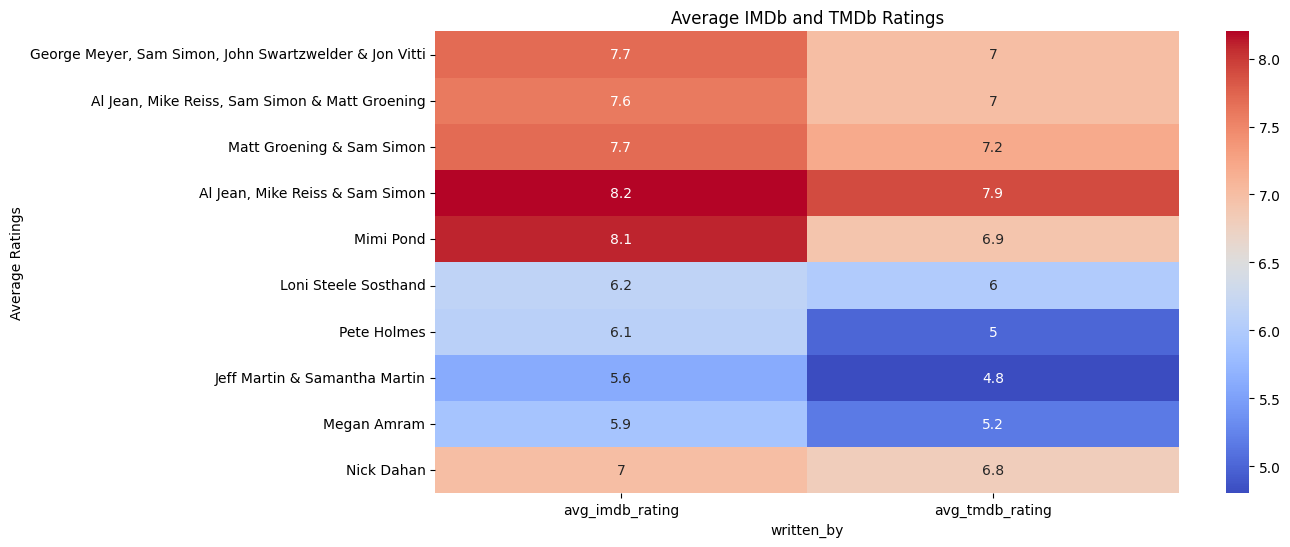

In [ ]:
# Create the second heatmap for avg_imdb_rating and avg_tmdb_rating
plt.figure(figsize=(12, 6))
sns.heatmap(writers_with_avg_ratings[['written_by', 'avg_imdb_rating', ]].set_index('written_by'), annot=True, cmap='coolwarm')
plt.title('Average IMDb and TMDb Ratings')
plt.xlabel('written_by')
plt.ylabel('Average Ratings')
plt.show()

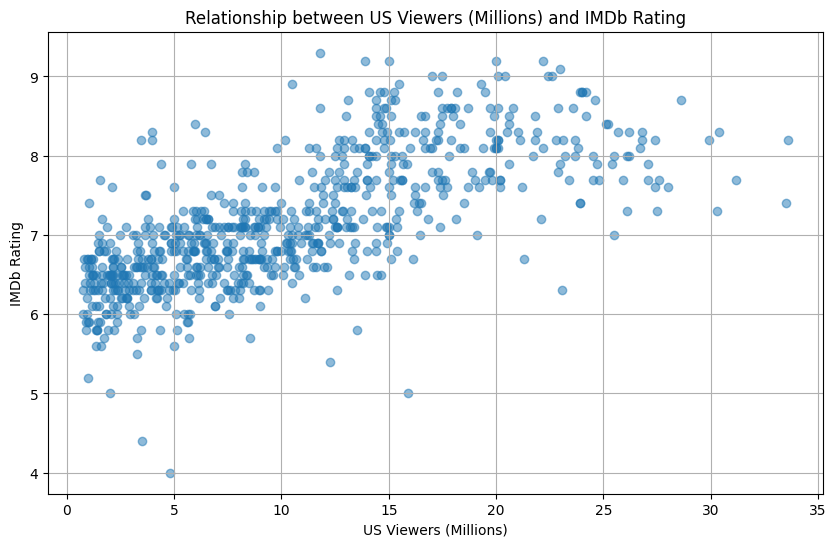

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['us_viewers_in_millions'], df['imdb_rating'], alpha=0.5)
plt.title('Relationship between US Viewers (Millions) and IMDb Rating')
plt.xlabel('US Viewers (Millions)')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()

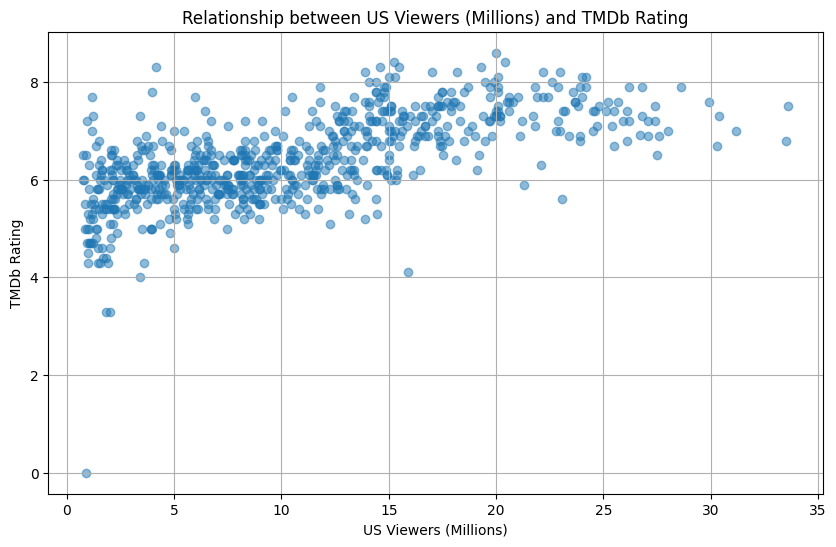

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['us_viewers_in_millions'], df['tmdb_rating'], alpha=0.5)
plt.title('Relationship between US Viewers (Millions) and TMDb Rating')
plt.xlabel('US Viewers (Millions)')
plt.ylabel('TMDb Rating')
plt.grid(True)
plt.show()